In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
Data = pd.read_csv('riceseeds.csv')

In [2]:
len(Data)
Data.shape

(8640, 264)

In [3]:
import random
SampleData = Data[Data['Species'].isin(random.sample(list(Data["Species"].unique()), 6))]
SampleData

,ID,Species,F1,F2,F3,F2/F3,F1/V,Eccentricity,7,8,...,253,254,255,256,257,258,259,260,261,262
1344,1345,NM14,0.212980,0.166720,0.130650,0.123220,0.102630,0.088493,0.078888,0.072109,...,0.51776,0.51495,0.51899,0.52211,13759,249.98,71.815,0.28728,0.041544,0.95785
1345,1346,NM14,0.188190,0.157830,0.116210,0.111740,0.093801,0.080058,0.071713,0.066061,...,0.52257,0.52161,0.52710,0.52390,12696,268.02,62.028,0.23143,0.046175,0.97285
1346,1347,NM14,0.218220,0.154330,0.129690,0.121040,0.099025,0.085611,0.075516,0.068197,...,0.51917,0.51794,0.52101,0.52147,14171,242.70,75.222,0.30993,0.038706,0.95076
1347,1348,NM14,0.260580,0.184650,0.150870,0.142570,0.116260,0.100440,0.089054,0.081888,...,0.52530,0.52619,0.52819,0.52441,14643,248.14,76.472,0.30819,0.038429,0.95133
1348,1349,NM14,0.209270,0.162050,0.127860,0.120130,0.099983,0.086631,0.077497,0.071247,...,0.52729,0.52451,0.52887,0.52912,14507,267.67,69.752,0.26058,0.040998,0.96545
1349,1350,NM14,0.245710,0.188920,0.145780,0.140080,0.115630,0.099000,0.088061,0.080052,...,0.53142,0.53062,0.53365,0.53643,15228,267.39,74.413,0.27829,0.039029,0.96050
1350,1351,NM14,0.175960,0.137210,0.115910,0.106880,0.090747,0.079711,0.071272,0.065242,...,0.53027,0.52990,0.53128,0.53291,13278,249.01,70.441,0.28289,0.042588,0.95915
1351,1352,NM14,0.197250,0.155200,0.132290,0.119790,0.101520,0.089218,0.079849,0.073233,...,0.53801,0.53825,0.54043,0.54326,14713,270.12,70.541,0.26115,0.040235,0.96530
1352,1353,NM14,0.140630,0.112630,0.090490,0.086423,0.074047,0.065198,0.059749,0.056826,...,0.52456,0.52729,0.52630,0.52680,13708,281.52,62.771,0.22297,0.044466,0.97483
1353,1354,NM14,0.130710,0.105700,0.087410,0.079469,0.067443,0.059260,0.053424,0.050098,...,0.51934,0.52050,0.52385,0.52531,14398,253.62,73.635,0.29034,0.039772,0.95692


In [4]:
SampleData[['ID','Species','F1','F2','F3','F2/F3','F1/V','Eccentricity']]

,ID,Species,F1,F2,F3,F2/F3,F1/V,Eccentricity
96,97,CT286,0.19132,0.136280,0.118830,0.107670,0.089121,0.077998
97,98,CT286,0.19518,0.137780,0.116700,0.111410,0.092550,0.081546
98,99,CT286,0.26071,0.196410,0.156020,0.146610,0.120240,0.102730
99,100,CT286,0.23029,0.182160,0.138600,0.129830,0.106660,0.089693
100,101,CT286,0.27007,0.216840,0.158290,0.154060,0.127650,0.107690
101,102,CT286,0.17619,0.146580,0.114390,0.106800,0.090527,0.077686
102,103,CT286,0.19539,0.149470,0.123590,0.114800,0.096759,0.084648
103,104,CT286,0.23066,0.185700,0.140720,0.131650,0.108600,0.091109
104,105,CT286,0.12132,0.107760,0.082645,0.077453,0.066833,0.057610
105,106,CT286,0.14269,0.110180,0.087773,0.085677,0.072892,0.064591


In [5]:
X = SampleData.values[:, 2:7] #features data
Y = SampleData.values[:, 1]   #target data
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 96)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print('Features data',X)
print('Target data', Y)

Features data [[0.19132000000000002 0.13627999999999998 0.11882999999999999 0.10767
  0.089121]
 [0.19518 0.13777999999999999 0.1167 0.11141 0.09255]
 [0.26071 0.19641 0.15602 0.14661 0.12024000000000001]
 ...
 [0.12480999999999999 0.090683 0.085437 0.083459 0.075501]
 [0.10991 0.085458 0.078691 0.074474 0.067389]
 [0.10558 0.081872 0.07130800000000001 0.07206599999999999 0.066138]]
Target data ['CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286' 'CT286'
 'CT286' 'CT286' '

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# Decision tree classifier
clf_entropy= DecisionTreeClassifier(criterion = "entropy", random_state = 96, max_depth = 10, min_samples_leaf = 9)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=96,
            splitter='best')

In [7]:
#from sklearn.externals.six import StringIO  
#import pydotplus 
#dotfile = StringIO() 
#tree.export_graphviz(clf_entropy, out_file=dotfile) 
#pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("my_tree3.png")

In [8]:
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

['ND9' 'DTL2' 'CT286' 'LocTroi183' 'KB27' 'KB27' 'ND9' 'DTL2' 'CT286'
 'KB27' 'DTL2' 'KB27' 'CT286' 'KB27' 'NepKB19' 'DTL2' 'ND9' 'ND9' 'DTL2'
 'CT286' 'KB27' 'DTL2' 'LocTroi183' 'ND9' 'NepKB19' 'LocTroi183' 'NepKB19'
 'LocTroi183' 'KB27' 'NepKB19' 'CT286' 'CT286' 'NepKB19' 'DTL2' 'DTL2'
 'DTL2' 'ND9' 'NepKB19' 'CT286' 'ND9' 'NepKB19' 'CT286' 'KB27' 'CT286'
 'LocTroi183' 'DTL2' 'DTL2' 'DTL2' 'NepKB19' 'CT286' 'DTL2' 'LocTroi183'
 'KB27' 'CT286' 'LocTroi183' 'DTL2' 'ND9' 'CT286' 'KB27' 'KB27' 'NepKB19'
 'ND9' 'CT286' 'DTL2' 'ND9' 'DTL2' 'ND9' 'KB27' 'NepKB19' 'DTL2' 'CT286'
 'LocTroi183' 'CT286' 'KB27' 'ND9' 'KB27' 'CT286' 'LocTroi183' 'DTL2'
 'KB27' 'KB27' 'LocTroi183' 'KB27' 'ND9' 'DTL2' 'DTL2' 'CT286' 'DTL2'
 'NepKB19' 'KB27' 'DTL2' 'DTL2' 'CT286' 'LocTroi183' 'NepKB19' 'ND9'
 'NepKB19' 'DTL2' 'ND9' 'DTL2' 'LocTroi183' 'LocTroi183' 'ND9' 'DTL2'
 'NepKB19' 'KB27' 'ND9' 'NepKB19' 'LocTroi183' 'CT286' 'CT286' 'NepKB19'
 'ND9' 'NepKB19' 'ND9' 'DTL2']


In [9]:
print("Accuracy is"), accuracy_score(y_test,y_pred_en)*100

Accuracy is


(None, 31.03448275862069)

In [10]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

def model_check(model):
     model.fit(X_train,y_train)
     y_train_pred = classification_report(y_train,model.predict(X_train))
     y_test_pred  = classification_report(y_test,model.predict(X_test))

     print("""【{model_name}】\n Train Accuracy: \n{train}
           \n Test Accuracy:  \n{test}""".format(model_name=model.__class__.__name__, train=y_train_pred, test=y_test_pred))

print(model_check(DecisionTreeClassifier()))

【DecisionTreeClassifier】
 Train Accuracy: 
              precision    recall  f1-score   support

       CT286       1.00      1.00      1.00        76
        DTL2       1.00      1.00      1.00        78
        KB27       1.00      1.00      1.00        76
  LocTroi183       1.00      1.00      1.00        78
         ND9       1.00      1.00      1.00        79
     NepKB19       1.00      1.00      1.00        73

   micro avg       1.00      1.00      1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

           
 Test Accuracy:  
              precision    recall  f1-score   support

       CT286       0.20      0.20      0.20        20
        DTL2       0.67      0.67      0.67        18
        KB27       0.20      0.20      0.20        20
  LocTroi183       0.26      0.28      0.27        18
         ND9       0.41      0.53      0.46        17
     NepKB19       0.41      0.30      0.35        23

   m

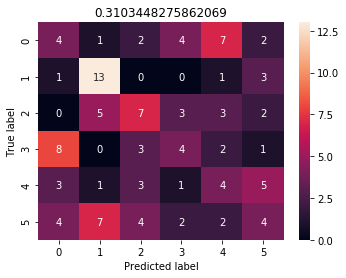

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_en) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred_en)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
#Grid search

from sklearn.model_selection import GridSearchCV

 # use a full grid over all parameters
param_grid = {"max_depth": [5,6,7,10],
              "max_features": [None,4,5],
              "min_samples_split": [2,3,5,9],
              "min_samples_leaf": [4,5,9],
              "criterion": ["entropy","gini"]}

Tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="accuracy",  #metrics
                 cv = 3,              #cross-validation
                 n_jobs = 1)          #number of core

Tree_grid.fit(X_train,y_train) #fit

Tree_grid_best = Tree_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",Tree_grid.best_params_)


Best Model Parameter:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
print(model_check(DecisionTreeClassifier()))

【DecisionTreeClassifier】
 Train Accuracy: 
              precision    recall  f1-score   support

       CT286       1.00      1.00      1.00        76
        DTL2       1.00      1.00      1.00        78
        KB27       1.00      1.00      1.00        76
  LocTroi183       1.00      1.00      1.00        78
         ND9       1.00      1.00      1.00        79
     NepKB19       1.00      1.00      1.00        73

   micro avg       1.00      1.00      1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

           
 Test Accuracy:  
              precision    recall  f1-score   support

       CT286       0.21      0.20      0.21        20
        DTL2       0.65      0.61      0.63        18
        KB27       0.24      0.25      0.24        20
  LocTroi183       0.32      0.44      0.37        18
         ND9       0.41      0.41      0.41        17
     NepKB19       0.41      0.30      0.35        23

   m

In [14]:
# Best model Decison tree
clf_entropy= DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 5, max_features = 4,  random_state = 96, min_samples_split = 2)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=96, splitter='best')

In [15]:
y_pred_en = clf_entropy.predict(X_test)
print("Accuracy is"), accuracy_score(y_test,y_pred_en)*100

Accuracy is


(None, 31.896551724137932)

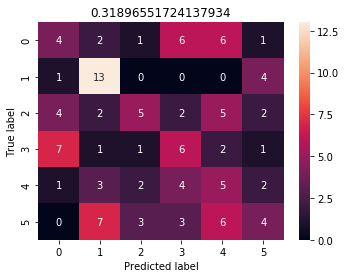

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_en) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, y_pred_en)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
# RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, random_state = 96)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=96, verbose=0, warm_start=False)

In [41]:
# Predicting the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

['ND9' 'DTL2' 'DTL2' 'KB27' 'LocTroi183' 'KB27' 'KB27' 'KB27' 'CT286'
 'KB27' 'DTL2' 'KB27' 'DTL2' 'KB27' 'NepKB19' 'DTL2' 'ND9' 'CT286' 'DTL2'
 'DTL2' 'LocTroi183' 'DTL2' 'LocTroi183' 'ND9' 'NepKB19' 'DTL2' 'CT286'
 'LocTroi183' 'ND9' 'KB27' 'LocTroi183' 'LocTroi183' 'DTL2' 'DTL2' 'DTL2'
 'DTL2' 'KB27' 'DTL2' 'LocTroi183' 'ND9' 'ND9' 'LocTroi183' 'LocTroi183'
 'LocTroi183' 'LocTroi183' 'DTL2' 'DTL2' 'DTL2' 'NepKB19' 'LocTroi183'
 'DTL2' 'KB27' 'KB27' 'LocTroi183' 'LocTroi183' 'DTL2' 'ND9' 'CT286'
 'KB27' 'ND9' 'DTL2' 'CT286' 'LocTroi183' 'DTL2' 'ND9' 'KB27' 'ND9' 'KB27'
 'NepKB19' 'DTL2' 'CT286' 'LocTroi183' 'LocTroi183' 'ND9' 'CT286' 'ND9'
 'LocTroi183' 'ND9' 'DTL2' 'LocTroi183' 'LocTroi183' 'LocTroi183' 'CT286'
 'KB27' 'DTL2' 'DTL2' 'LocTroi183' 'DTL2' 'LocTroi183' 'ND9' 'DTL2' 'DTL2'
 'CT286' 'LocTroi183' 'LocTroi183' 'NepKB19' 'NepKB19' 'DTL2' 'CT286'
 'DTL2' 'ND9' 'LocTroi183' 'CT286' 'DTL2' 'LocTroi183' 'KB27' 'NepKB19'
 'DTL2' 'LocTroi183' 'CT286' 'CT286' 'KB27' 'NepKB19' 'DTL2

In [42]:
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 38.793103448275865)

In [43]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

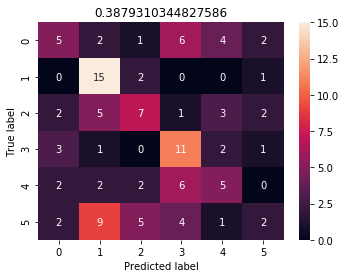

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, Y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [45]:
#Grid search

from sklearn.model_selection import GridSearchCV

 # use a full grid over all parameters
param_grid = {"max_depth": [None,5,4],
              "n_estimators":[100,200,400],
              #"max_features": ['auto'],
              #"min_samples_split": [2,3,5],
              "min_samples_leaf": [1,4,5],
              #"bootstrap": [True],
              "criterion": ["entropy","gini"]}

forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="accuracy",  #metrics
                 cv = 3,              #cross-validation
                 n_jobs = 1)          #number of core

forest_grid.fit(X_train,y_train) #fit

forest_grid_best = forest_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",forest_grid.best_params_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Model Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}


In [50]:
# RandomForest classifier with best parament
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', min_samples_leaf = 4, max_depth = None, random_state =96)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=96, verbose=0, warm_start=False)

In [51]:
# Predicting the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

['ND9' 'DTL2' 'DTL2' 'KB27' 'LocTroi183' 'KB27' 'KB27' 'KB27' 'ND9' 'KB27'
 'DTL2' 'KB27' 'DTL2' 'KB27' 'NepKB19' 'DTL2' 'ND9' 'ND9' 'DTL2' 'CT286'
 'ND9' 'DTL2' 'LocTroi183' 'ND9' 'NepKB19' 'KB27' 'CT286' 'LocTroi183'
 'ND9' 'NepKB19' 'LocTroi183' 'CT286' 'CT286' 'DTL2' 'DTL2' 'DTL2' 'KB27'
 'CT286' 'LocTroi183' 'ND9' 'ND9' 'CT286' 'LocTroi183' 'LocTroi183'
 'LocTroi183' 'DTL2' 'DTL2' 'DTL2' 'NepKB19' 'LocTroi183' 'DTL2' 'KB27'
 'KB27' 'LocTroi183' 'LocTroi183' 'DTL2' 'ND9' 'CT286' 'KB27' 'ND9' 'DTL2'
 'ND9' 'NepKB19' 'DTL2' 'ND9' 'KB27' 'ND9' 'KB27' 'NepKB19' 'DTL2' 'CT286'
 'LocTroi183' 'LocTroi183' 'ND9' 'ND9' 'ND9' 'LocTroi183' 'KB27' 'DTL2'
 'ND9' 'NepKB19' 'LocTroi183' 'CT286' 'KB27' 'DTL2' 'DTL2' 'LocTroi183'
 'DTL2' 'ND9' 'ND9' 'DTL2' 'DTL2' 'CT286' 'LocTroi183' 'NepKB19' 'CT286'
 'NepKB19' 'DTL2' 'ND9' 'DTL2' 'ND9' 'LocTroi183' 'CT286' 'DTL2' 'ND9'
 'KB27' 'NepKB19' 'DTL2' 'LocTroi183' 'CT286' 'LocTroi183' 'KB27'
 'NepKB19' 'CT286' 'LocTroi183' 'DTL2']


In [52]:
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 38.793103448275865)

In [53]:
#ADABOOTS
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1)
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)

In [54]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

['ND9' 'DTL2' 'NepKB19' 'CT286' 'CT286' 'ND9' 'KB27' 'NepKB19' 'KB27'
 'CT286' 'DTL2' 'DTL2' 'DTL2' 'NepKB19' 'NepKB19' 'CT286' 'ND9' 'KB27'
 'CT286' 'CT286' 'ND9' 'LocTroi183' 'ND9' 'CT286' 'NepKB19' 'DTL2' 'CT286'
 'CT286' 'NepKB19' 'KB27' 'KB27' 'ND9' 'NepKB19' 'DTL2' 'CT286' 'CT286'
 'KB27' 'NepKB19' 'ND9' 'ND9' 'KB27' 'ND9' 'CT286' 'ND9' 'LocTroi183'
 'CT286' 'LocTroi183' 'DTL2' 'NepKB19' 'CT286' 'KB27' 'KB27' 'KB27'
 'LocTroi183' 'ND9' 'NepKB19' 'ND9' 'CT286' 'ND9' 'KB27' 'DTL2' 'KB27'
 'ND9' 'CT286' 'KB27' 'KB27' 'ND9' 'KB27' 'NepKB19' 'CT286' 'CT286' 'ND9'
 'ND9' 'NepKB19' 'KB27' 'ND9' 'KB27' 'CT286' 'KB27' 'ND9' 'ND9' 'CT286'
 'KB27' 'KB27' 'KB27' 'LocTroi183' 'ND9' 'DTL2' 'ND9' 'ND9' 'LocTroi183'
 'DTL2' 'KB27' 'LocTroi183' 'ND9' 'CT286' 'KB27' 'KB27' 'KB27' 'KB27'
 'ND9' 'ND9' 'NepKB19' 'CT286' 'ND9' 'KB27' 'LocTroi183' 'DTL2' 'CT286'
 'KB27' 'KB27' 'KB27' 'ND9' 'NepKB19' 'LocTroi183' 'CT286']


In [55]:
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 25.862068965517242)

In [56]:
#Grid search

# use a full grid over all parameters
param_grid = {"n_estimators":[50,100,200],
              "base_estimator":[None],
              "algorithm":['SAMME'],
              "learning_rate": [0.1, 0.05, 0.03, 1]}

Ada_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="accuracy",  #metrics
                 cv = 3,              #cross-validation
                 n_jobs = 1)          #number of core

Ada_grid.fit(X_train,y_train) #fit

Ada_grid_best = Ada_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",Ada_grid.best_params_)

Best Model Parameter:  {'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 50}


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME')
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1,
          n_estimators=200, random_state=None)

In [43]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

['N98' 'NBK' 'KB6' 'DV108' 'KB6' 'NBK' 'HaNa39' 'NBK' 'KB6' 'DV108'
 'DV108' 'NBK' 'NBK' 'N98' 'KB6' 'DV108' 'R998KBL' 'NBK' 'R998KBL' 'KB6'
 'HaNa39' 'NBK' 'HaNa39' 'KB6' 'R998KBL' 'KB6' 'HaNa39' 'KB6' 'NBK'
 'HaNa39' 'DV108' 'NBK' 'DV108' 'DV108' 'DV108' 'DV108' 'R998KBL'
 'R998KBL' 'R998KBL' 'NBK' 'KB6' 'N98' 'NBK' 'DV108' 'N98' 'DV108'
 'HaNa39' 'HaNa39' 'KB6' 'DV108' 'DV108' 'DV108' 'DV108' 'DV108' 'HaNa39'
 'DV108' 'KB6' 'KB6' 'KB6' 'N98' 'KB6' 'HaNa39' 'HaNa39' 'NBK' 'HaNa39'
 'HaNa39' 'KB6' 'KB6' 'HaNa39' 'DV108' 'N98' 'DV108' 'N98' 'N98' 'HaNa39'
 'HaNa39' 'HaNa39' 'DV108' 'R998KBL' 'HaNa39' 'NBK' 'DV108' 'DV108' 'NBK'
 'KB6' 'NBK' 'HaNa39' 'KB6' 'DV108' 'N98' 'NBK' 'DV108' 'HaNa39' 'N98'
 'KB6' 'DV108' 'N98' 'DV108' 'KB6' 'N98' 'HaNa39' 'HaNa39' 'R998KBL'
 'DV108' 'NBK' 'HaNa39' 'KB6' 'HaNa39' 'NBK' 'HaNa39' 'HaNa39' 'R998KBL'
 'DV108' 'NBK' 'KB6' 'NBK']


In [44]:
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 39.6551724137931)

In [ ]:
# sử dụng LDA để phân tách các đặc trưng
# tsne : visualize dl -> chạy trước khi LDA và sau khi LDA
# Dùng features từ 7 đến cuối
# Dùng features từ 1 đến 6